In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from patsy import dmatrices, dmatrix

In [2]:
data = pd.read_csv("clean_dataset.csv", usecols = [1,3, 4, 5,6])

In [3]:
len(data)

28317

In [4]:
data.head()

Title  \
0                                  Data Analyst   
1                              Business Analyst   
2                         ML Data Associate III   
3                                  Data Analyst   
4  Implementation Specialist / Business Analyst   

                                         Description   Salary         City  \
0  With one application you can be considered for...      NaN      Seattle   
1  Microsoft Cloud Hardware Infrastructure and En...      NaN      Redmond   
2  Basic Qualifications\nBachelors degree or comm...      NaN      Seattle   
3  Gupta Media is looking for a Data Analyst to j...      NaN       Boston   
4  ScerIS is looking to add experienced and entry...  92500.0  Marlborough   

  State  
0    WA  
1    WA  
2    WA  
3    MA  
4    MA

In [5]:
# We will create a salary dataset where there are no null values
data = data[data['Salary'].notnull()]

In [6]:
data = data.reset_index(drop = True)

In [7]:
data.head()

Title  \
0       Implementation Specialist / Business Analyst   
1  Entry Level Data Analyst (Information Technology)   
2            Board Certified Behavior Analyst (BCBA)   
3  Full Time or Part Time Board Certified Behavio...   
4  Board Certified Behavior Analyst (BCBA) / Clin...   

                                         Description   Salary         City  \
0  ScerIS is looking to add experienced and entry...  92500.0  Marlborough   
1  ResponsibilitiesInterpret data, analyze result...  41000.0       Boston   
2  Aspire Learning Center, LLC provides center an...  75000.0      Beverly   
3  We are currently seeking a Full Time or Part-T...  72500.0        Salem   
4  About Us: Merrimack Autism consultants is a pr...  76000.0       Boston   

  State  
0    MA  
1    MA  
2    MA  
3    MA  
4    MA

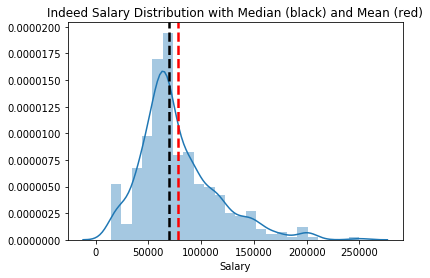

In [8]:
# Let's look at the salary distribution, mean, median values
ax = sns.distplot(data["Salary"])
ax.axvline(data["Salary"].median(), lw=2.5, ls='dashed', color='black')
ax.axvline(data["Salary"].mean(), lw=2.5, ls='dashed', color='red')
plt.title('Indeed Salary Distribution with Median (black) and Mean (red)');

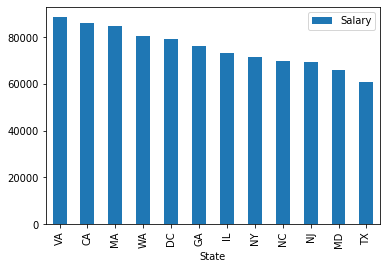

In [9]:
# Salaries per State
data.groupby(['State']).mean().sort_values("Salary", ascending = False).plot.bar();

In [10]:
# Create a new column stating high salary for anything above the median
data['high_salary'] = data.apply(lambda x: 1 if x['Salary'] > data["Salary"].median() else 0, axis = 1)

In [11]:
data['high_salary'].value_counts()

0    219
1    190
Name: high_salary, dtype: int64

In [12]:
def title_function(x):
    if "data scientist" in x or "scien" in x:
        return "data scientist"
    elif "machine learning" in x or "ml" in x or "statist" in x or "a.i" in x or "ai" in x or "artificial" in x or "nlp" in x or "natural language" in x or "deep learning" in x:
        return "machine learning"
    elif "data analyst" in x or "data" in x:
        return "data analyst"
    elif "product analyst" in x or "product" in x:
        return "product analyst"
    elif "business analyst" in x or "business" in x:
        return "business analyst"
    else: return "others"

data["modified_title"] = data["Title"].str.lower().apply(title_function)

In [13]:
data['modified_title'].value_counts()

others              176
business analyst    105
data analyst         85
data scientist       27
machine learning     12
product analyst       4
Name: modified_title, dtype: int64

In [14]:
def seniority_function(x):
    if "entry" in x or "jr" in x or "junior" in x or "fresh" in x:
        return "entry level"
    elif "lead" in x or "principal" in x or "senior" in x or "sr" in x or "sr." in x:
        return "lead/principal"
    elif "manager" in x or "director" in x:
        return "manager"
    elif "intern" in x:
        return "intern"
    else: return "others"

data["seniority"] = data["Title"].str.lower().apply(seniority_function)

In [15]:
data['seniority'].value_counts()

others            300
entry level        53
lead/principal     33
intern             14
manager             9
Name: seniority, dtype: int64

In [16]:
# Creating a customized list of technology skills
technology_skills_list = ['python', ' r ','sql','java','scala','excel',
                          'aws','hadoop','spark','tableau','sas','c++',
                          'linux','hive','oracle','perl','mysql','matlab',
                          'html','tensorflow','spss','mongodb']

In [17]:
tech_skills = set(technology_skills_list)
data["technology_skills_count"] = 0

In [18]:
data.head()

Title  \
0       Implementation Specialist / Business Analyst   
1  Entry Level Data Analyst (Information Technology)   
2            Board Certified Behavior Analyst (BCBA)   
3  Full Time or Part Time Board Certified Behavio...   
4  Board Certified Behavior Analyst (BCBA) / Clin...   

                                         Description   Salary         City  \
0  ScerIS is looking to add experienced and entry...  92500.0  Marlborough   
1  ResponsibilitiesInterpret data, analyze result...  41000.0       Boston   
2  Aspire Learning Center, LLC provides center an...  75000.0      Beverly   
3  We are currently seeking a Full Time or Part-T...  72500.0        Salem   
4  About Us: Merrimack Autism consultants is a pr...  76000.0       Boston   

  State  high_salary    modified_title    seniority  technology_skills_count  
0    MA            1  business analyst       others                        0  
1    MA            0      data analyst  entry level                        0  
2    MA            1            others       others                        0  
3    MA            1            others       others                        0  
4    MA            1            others       others                        0

In [19]:
for i in range(len(data)):
    desc = set(word_tokenize(data["Description"][i].lower()))
    data.iloc[i, 8] = len(tech_skills.intersection(desc))

In [20]:
# Creating a customized list of technical skills
technical_skills_list = ['big data', 'cloud','dashboard','business problem',
         'predictive model','cluster','data manipulation','experimental design',
         'machine learning','data analysis','data visualization',
         'modeling','statistical analysis','research','deep learning',
         'optimization','decision tree','logistic','random forest',
         'a/b testing','web scraping','neural network','regression']

In [21]:
technical_skills = set(technical_skills_list)
data["technical_skills_count"] = 0

In [22]:
for i in range(len(data)):
    desc = set(word_tokenize(data["Description"][i].lower()))
    data.iloc[i, 9] = len(technical_skills.intersection(desc))

In [23]:
# Creating a customized soft skills list
soft_skills_list = ['problem solving','collaborative','independent','curious','leadership',
      'interpersonal skills','communication skills','client management','team build',
      'storytell']

In [24]:
soft_skills = set(soft_skills_list)
data["soft_skills_count"] = 0

In [25]:
for i in range(len(data)):
    desc = set(word_tokenize(data["Description"][i].lower()))
    data.iloc[i, 10] = len(soft_skills.intersection(desc))

In [26]:
data.drop(['Title','Description', "Salary", "City"], axis = 1, inplace = True)

In [27]:
data.head()

State  high_salary    modified_title    seniority  technology_skills_count  \
0    MA            1  business analyst       others                        1   
1    MA            0      data analyst  entry level                        0   
2    MA            1            others       others                        0   
3    MA            1            others       others                        0   
4    MA            1            others       others                        0   

   technical_skills_count  soft_skills_count  
0                       1                  0  
1                       0                  0  
2                       0                  0  
3                       0                  0  
4                       0                  0

In [28]:
factors = ["State", "modified_title", "seniority"]

In [29]:
data1 = pd.get_dummies(data, columns = factors)
data1.head()

high_salary  technology_skills_count  technical_skills_count  \
0            1                        1                       1   
1            0                        0                       0   
2            1                        0                       0   
3            1                        0                       0   
4            1                        0                       0   

   soft_skills_count  State_CA  State_DC  State_GA  State_IL  State_MA  \
0                  0         0         0         0         0         1   
1                  0         0         0         0         0         1   
2                  0         0         0         0         0         1   
3                  0         0         0         0         0         1   
4                  0         0         0         0         0         1   

   State_MD  ...  modified_title_data analyst  modified_title_data scientist  \
0         0  ...                            0                              0   
1         0  ...                            1                              0   
2         0  ...                            0                              0   
3         0  ...                            0                              0   
4         0  ...                            0                              0   

   modified_title_machine learning  modified_title_others  \
0                                0                      0   
1                                0                      0   
2                                0                      1   
3                                0                      1   
4                                0                      1   

   modified_title_product analyst  seniority_entry level  seniority_intern  \
0                               0                      0                 0   
1                               0                      1                 0   
2                               0                      0                 0   
3                               0                      0                 0   
4                               0                      0                 0   

   seniority_lead/principal  seniority_manager  seniority_others  
0                         0                  0                 1  
1                         0                  0                 0  
2                         0                  0                 1  
3                         0                  0                 1  
4                         0                  0                 1  

[5 rows x 27 columns]

In [30]:
drop_col = ["State_WA", "modified_title_others", "seniority_others", "high_salary"]

In [31]:
data1 = data1.drop(drop_col, axis=1)
data1.columns

Index(['technology_skills_count', 'technical_skills_count',
       'soft_skills_count', 'State_CA', 'State_DC', 'State_GA', 'State_IL',
       'State_MA', 'State_MD', 'State_NC', 'State_NJ', 'State_NY', 'State_TX',
       'State_VA', 'modified_title_business analyst',
       'modified_title_data analyst', 'modified_title_data scientist',
       'modified_title_machine learning', 'modified_title_product analyst',
       'seniority_entry level', 'seniority_intern', 'seniority_lead/principal',
       'seniority_manager'],
      dtype='object')

In [32]:
X1 = data1
Y1 = data['high_salary']

In [33]:
X1.head()

technology_skills_count  technical_skills_count  soft_skills_count  \
0                        1                       1                  0   
1                        0                       0                  0   
2                        0                       0                  0   
3                        0                       0                  0   
4                        0                       0                  0   

   State_CA  State_DC  State_GA  State_IL  State_MA  State_MD  State_NC  ...  \
0         0         0         0         0         1         0         0  ...   
1         0         0         0         0         1         0         0  ...   
2         0         0         0         0         1         0         0  ...   
3         0         0         0         0         1         0         0  ...   
4         0         0         0         0         1         0         0  ...   

   State_VA  modified_title_business analyst  modified_title_data analyst  \
0         0                                1                            0   
1         0                                0                            1   
2         0                                0                            0   
3         0                                0                            0   
4         0                                0                            0   

   modified_title_data scientist  modified_title_machine learning  \
0                              0                                0   
1                              0                                0   
2                              0                                0   
3                              0                                0   
4                              0                                0   

   modified_title_product analyst  seniority_entry level  seniority_intern  \
0                               0                      0                 0   
1                               0                      1                 0   
2                               0                      0                 0   
3                               0                      0                 0   
4                               0                      0                 0   

   seniority_lead/principal  seniority_manager  
0                         0                  0  
1                         0                  0  
2                         0                  0  
3                         0                  0  
4                         0                  0  

[5 rows x 23 columns]

In [34]:
Y1.head()

0    1
1    0
2    1
3    1
4    1
Name: high_salary, dtype: int64

In [35]:
X1["cons"] = 1

In [36]:
X1.head()

technology_skills_count  technical_skills_count  soft_skills_count  \
0                        1                       1                  0   
1                        0                       0                  0   
2                        0                       0                  0   
3                        0                       0                  0   
4                        0                       0                  0   

   State_CA  State_DC  State_GA  State_IL  State_MA  State_MD  State_NC  ...  \
0         0         0         0         0         1         0         0  ...   
1         0         0         0         0         1         0         0  ...   
2         0         0         0         0         1         0         0  ...   
3         0         0         0         0         1         0         0  ...   
4         0         0         0         0         1         0         0  ...   

   modified_title_business analyst  modified_title_data analyst  \
0                                1                            0   
1                                0                            1   
2                                0                            0   
3                                0                            0   
4                                0                            0   

   modified_title_data scientist  modified_title_machine learning  \
0                              0                                0   
1                              0                                0   
2                              0                                0   
3                              0                                0   
4                              0                                0   

   modified_title_product analyst  seniority_entry level  seniority_intern  \
0                               0                      0                 0   
1                               0                      1                 0   
2                               0                      0                 0   
3                               0                      0                 0   
4                               0                      0                 0   

   seniority_lead/principal  seniority_manager  cons  
0                         0                  0     1  
1                         0                  0     1  
2                         0                  0     1  
3                         0                  0     1  
4                         0                  0     1  

[5 rows x 24 columns]

In [37]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3) 

## CART

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

In [39]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X1_train, Y1_train)

#Predict the response for test dataset
Y_pred = clf.predict(X1_test)

In [40]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y1_test, Y_pred))

Accuracy: 0.6747967479674797


In [41]:
feature_cols = X1.columns

C:\Users\vardh\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


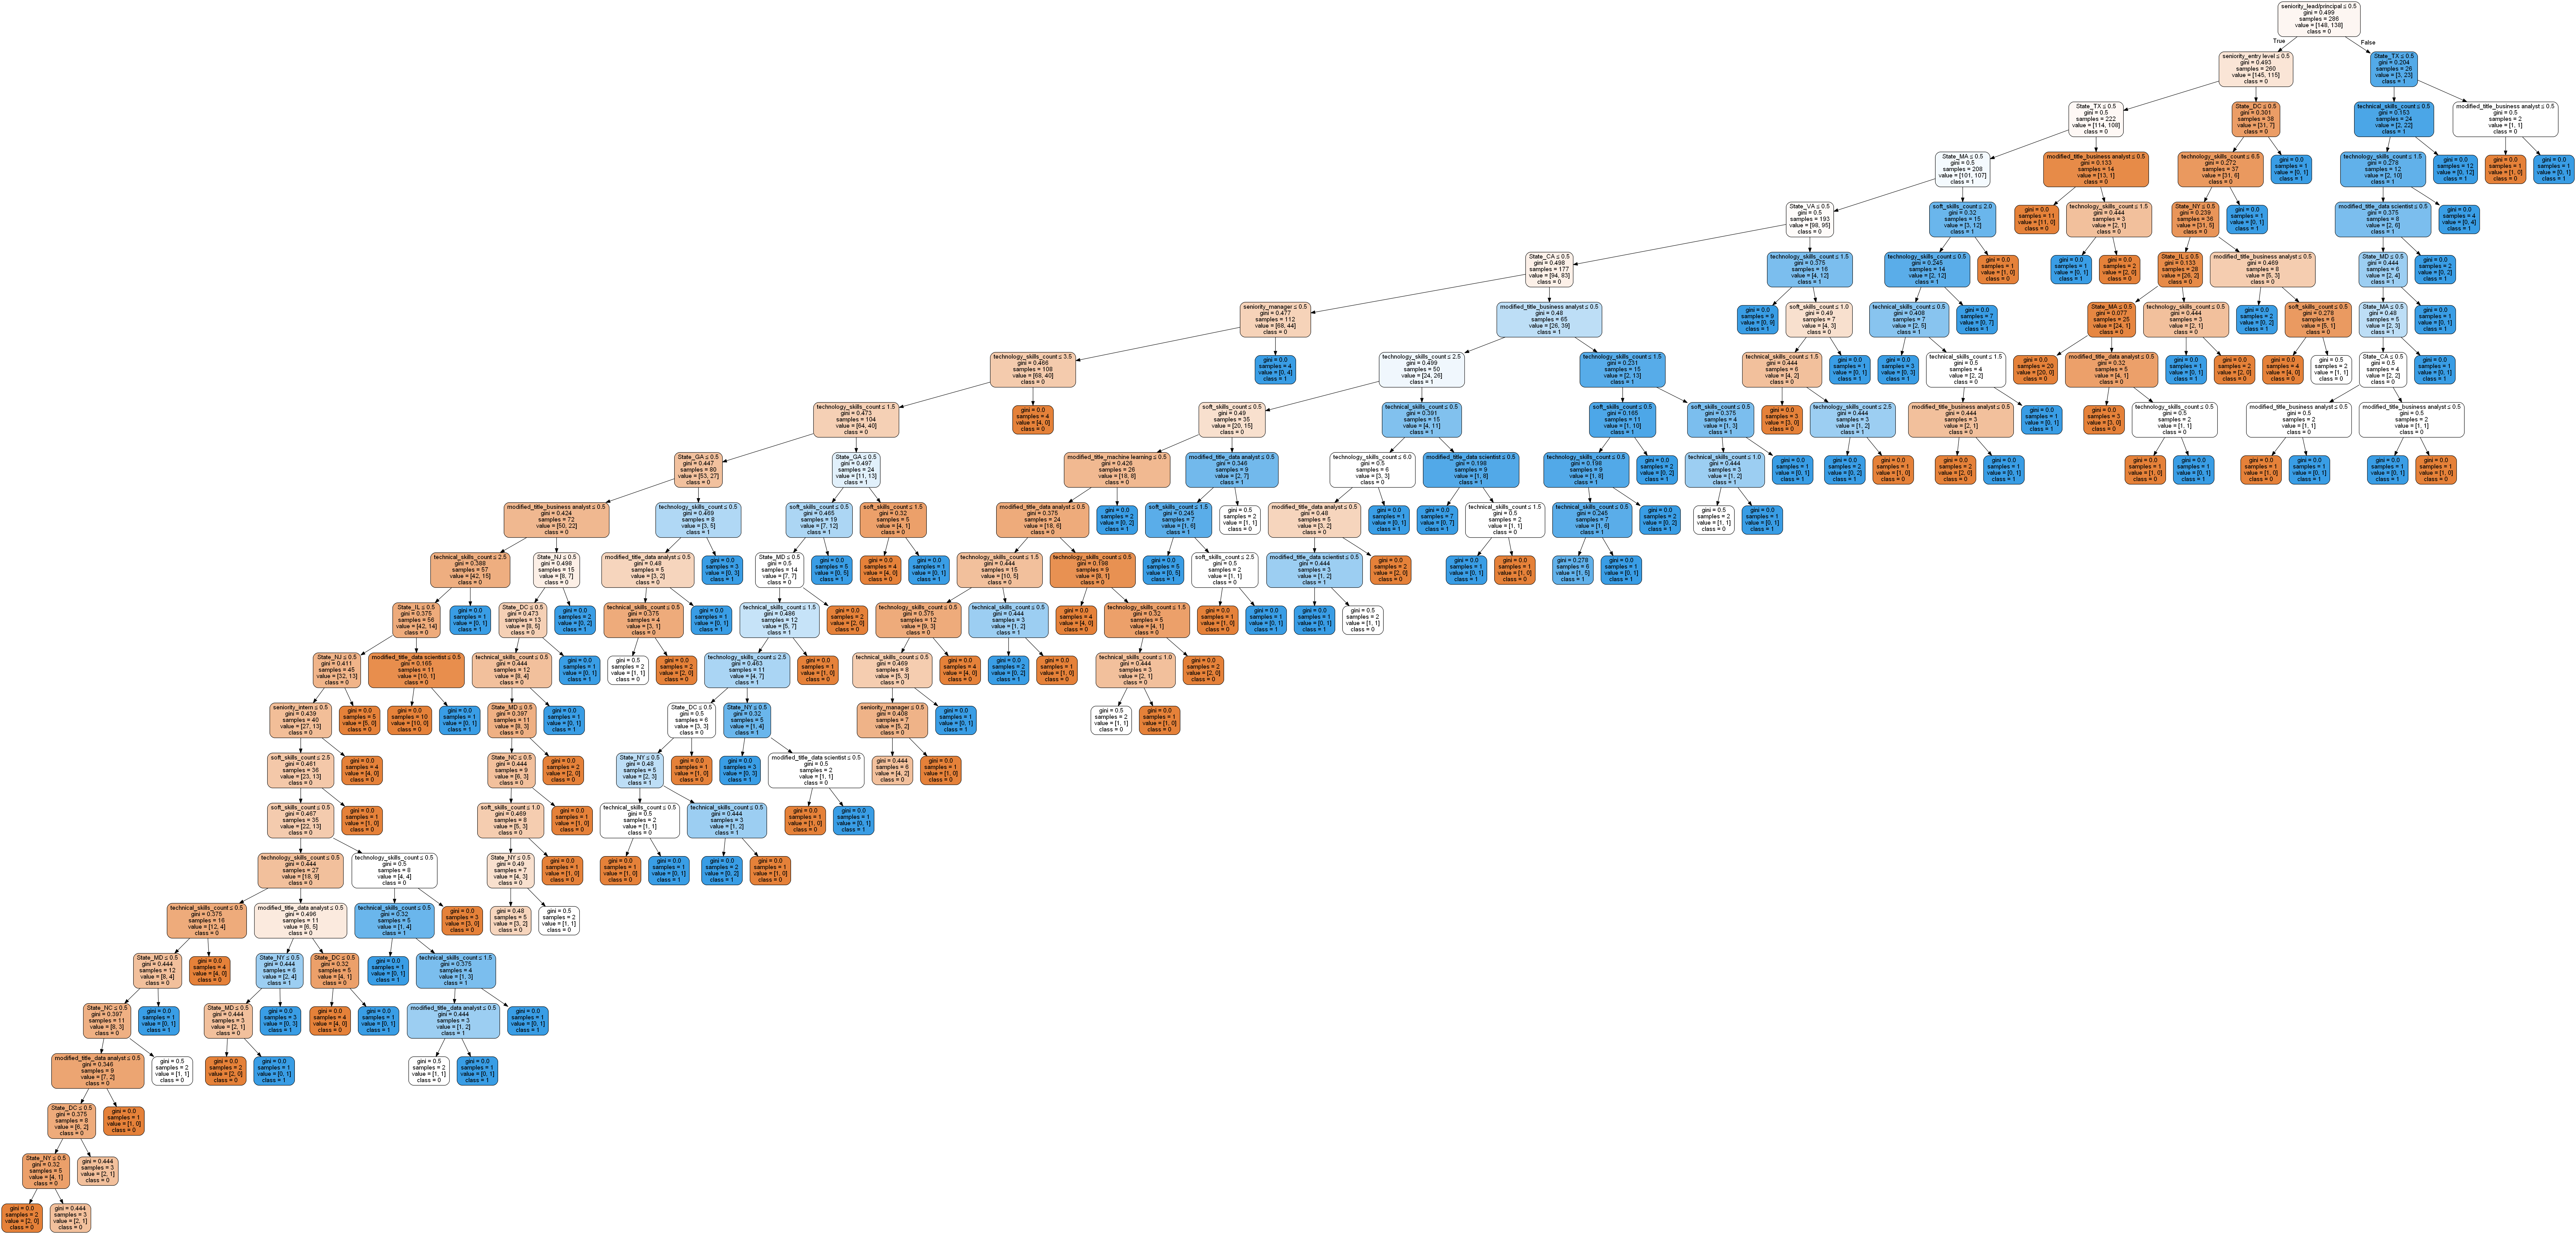

In [42]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('salary_pred.png')
Image(graph.create_png())

In [43]:
# Create Decision Tree classifer object with prunning based on depth and entropy
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf1 = clf1.fit(X1_train,Y1_train)

#Predict the response for test dataset
Y_pred1 = clf1.predict(X1_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y1_test, Y_pred1))

Accuracy: 0.5284552845528455


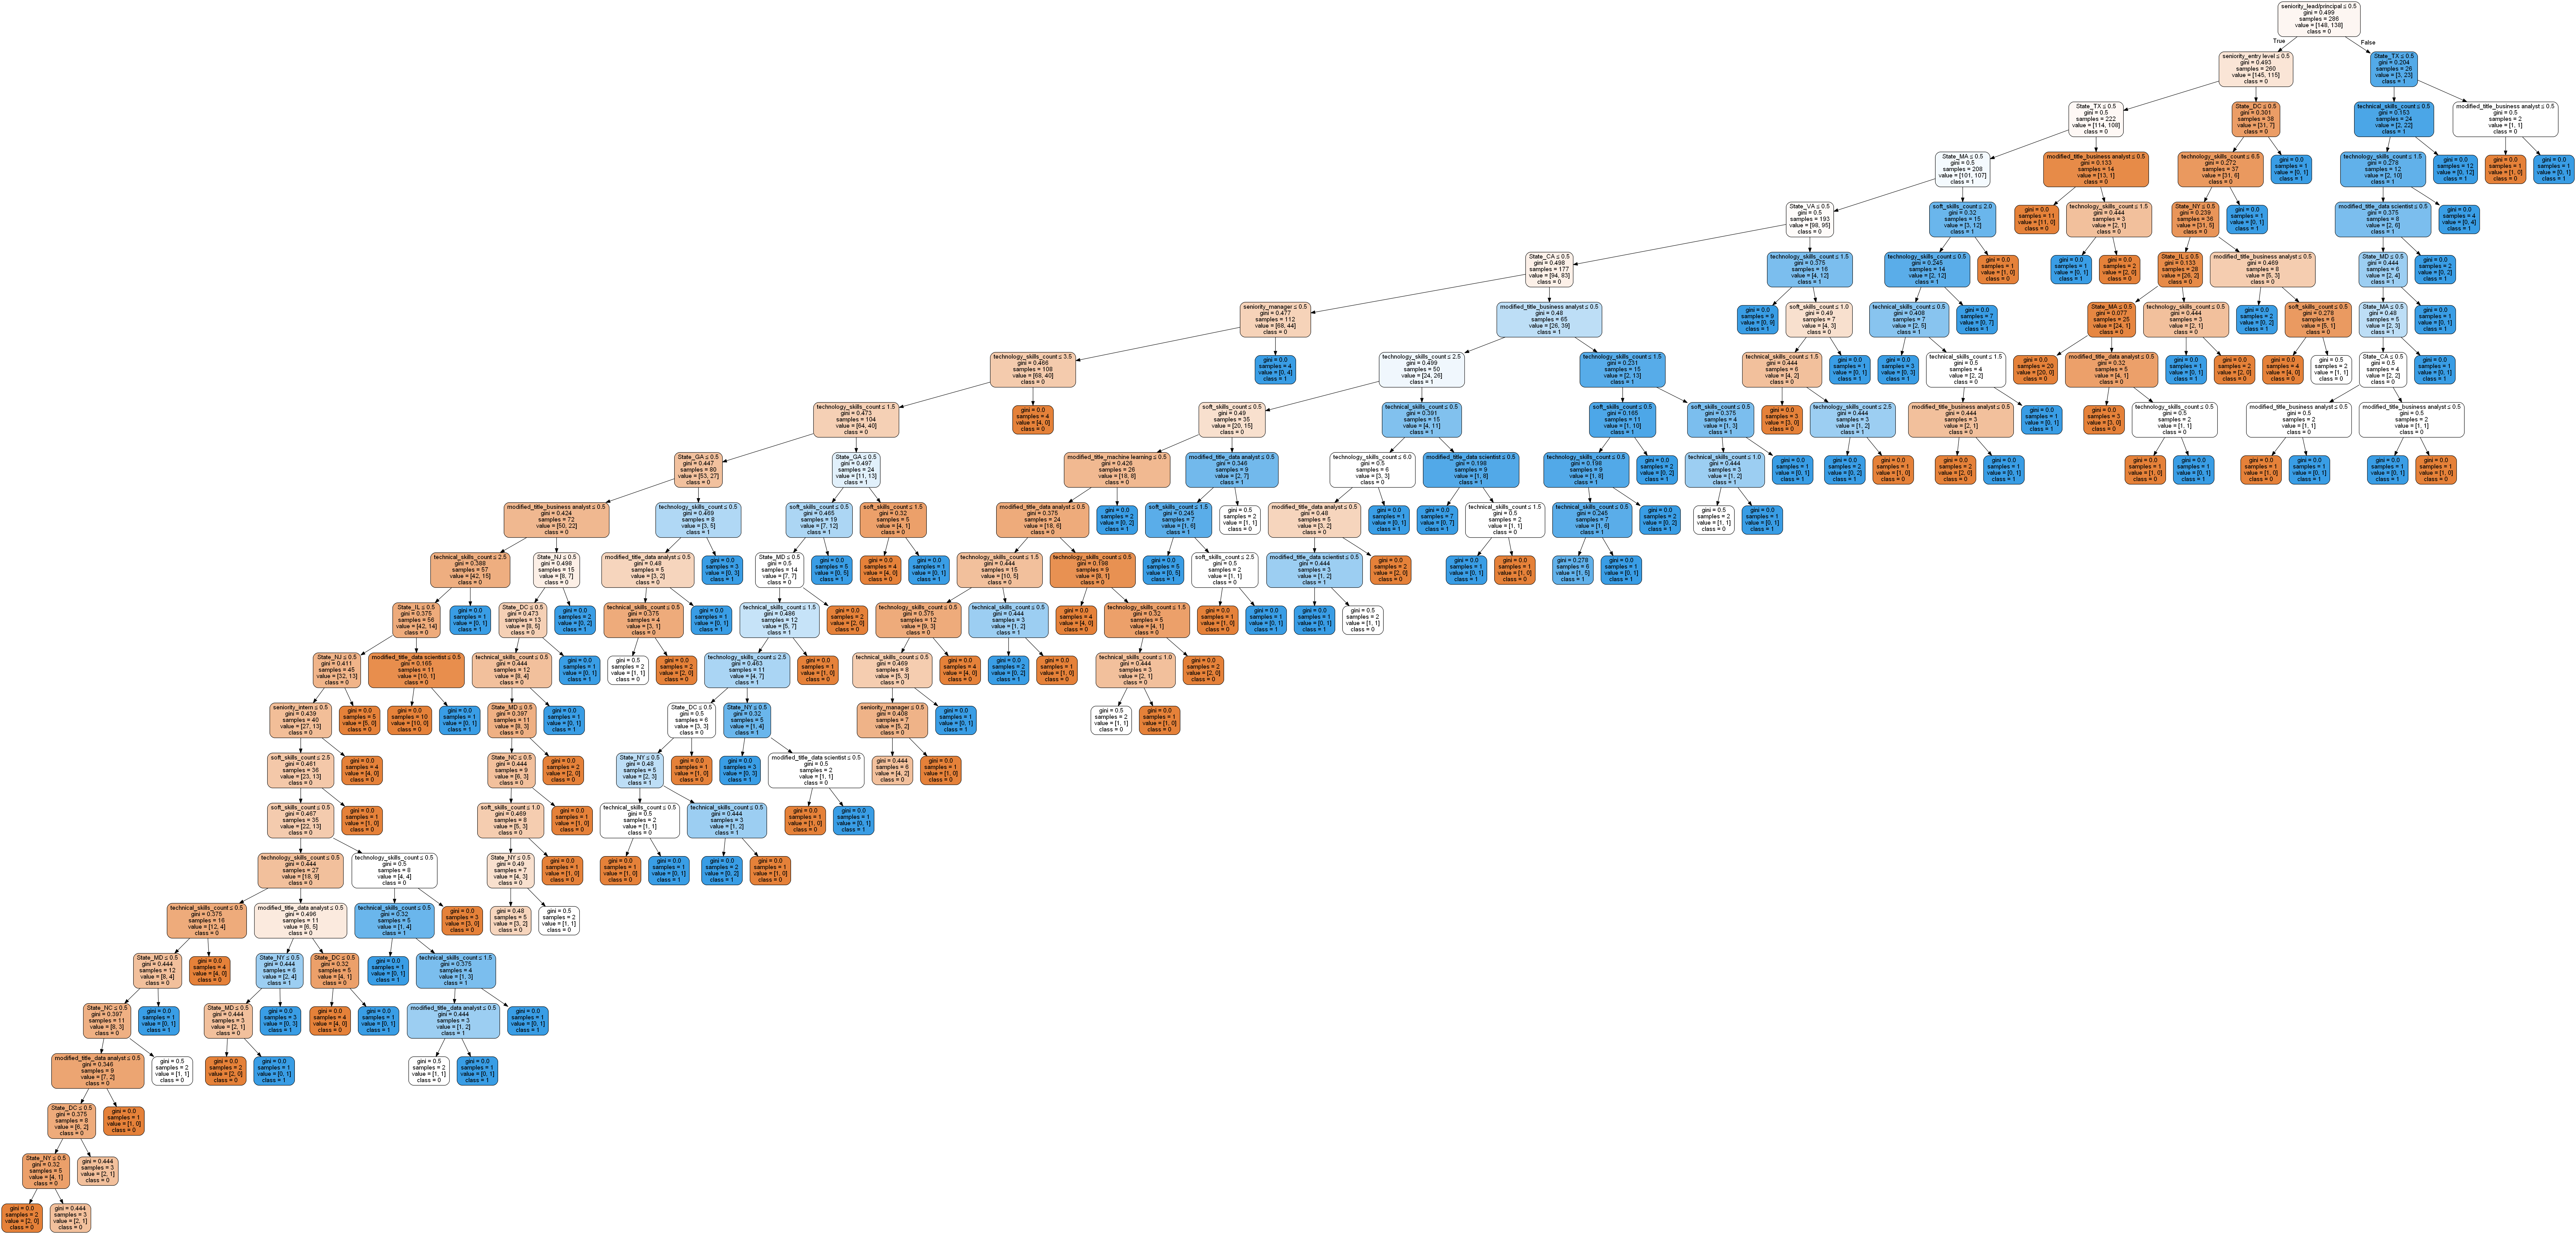

In [44]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('salary_pred1.png')
Image(graph.create_png())

In [45]:
print(confusion_matrix(Y1_test, Y_pred))

[[51 20]
 [20 32]]


In [46]:
print(classification_report(Y1_test, Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        71
           1       0.62      0.62      0.62        52

    accuracy                           0.67       123
   macro avg       0.67      0.67      0.67       123
weighted avg       0.67      0.67      0.67       123



In [47]:
print(confusion_matrix(Y1_test, Y_pred1))

[[16 55]
 [ 3 49]]


In [48]:
print(classification_report(Y1_test, Y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.23      0.36        71
           1       0.47      0.94      0.63        52

    accuracy                           0.53       123
   macro avg       0.66      0.58      0.49       123
weighted avg       0.69      0.53      0.47       123

